[[ 1  1 -1 -1]
 [-1 -1 -1 -1]
 [-1  1  1 -1]
 [ 1  1  1 -1]]
2408
[[ 1  1  1  1]
 [-1 -1 -1 -1]
 [ 1  1 -1  1]
 [-1 -1  1 -1]]
4796
Дельта равна: 2388
Переходим к 5 шагу
0.0
0.732215062749672
[[ 1  1  1  1]
 [-1 -1 -1 -1]
 [ 1  1 -1  1]
 [-1 -1  1 -1]]
2408


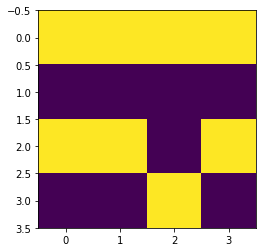

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from random import randint
from math import exp
from random import choice

T = 0.8
#Шаг 1
#Создаем случайным образом матрицу 4x4.
ones = [-1, 1]
size = 4
matrix1 = np.array([[choice(ones) for i in range(size)] for j in range(size)])
sum1 = 0
for i in range(601):
    for i in range(size):
        for j in range(size-1):
            sum1 += matrix1[i][j]*matrix1[i][j+1]
        sum1 += matrix1[i][size-1]*matrix1[i][0]
    
        matrix_transpose = np.transpose(matrix1)
        sum2 = 0
        for k in range(size):
            for m in range(size-1):
                sum2 += matrix_transpose[k][m]*matrix_transpose[k][m+1]
            sum2 += matrix_transpose[k][size-1]*matrix_transpose[k][0]
print(matrix1)

#Находим сумму матрицы №1.
E1=sum1+sum2
print(E1)

#Шаг 2
#Случайным образом меняем знак случайного элемента на противоположный.
a = random.randint(0, size-1)
b = random.randint(0, size-1)
matrix1[a][b] *= -1
matrix2 = np.array([[choice(ones) for i in range(size)] for j in range(size)])
sum1 = 0
for i in range(601):
    for i in range(size):
        for j in range(size-1):
            sum1 += matrix2[i][j]*matrix2[i][j+1]
        sum1 += matrix2[i][size-1]*matrix2[i][0]
    
        matrix_transpose = np.transpose(matrix2)
        sum2 = 0
        for k in range(size):
            for m in range(size-1):
                sum2 += matrix_transpose[k][m]*matrix_transpose[k][m+1]
            sum2 += matrix_transpose[k][size-1]*matrix_transpose[k][0]
print(matrix2)

#Шаг 3
#Находим сумму матрицы №2.
E2 = sum1 + sum2
print(E2)

#Шаг 4
#Находим дельту.
delta = E2 - E1
if delta <= 0:
    print('Вернуться к шагу 2')
else:
    print('Дельта равна:', delta)
    print('Переходим к 5 шагу')

#Шаг 5
#Вычисляем по формуле величину W = exp(-∆Е / T), где T- константа.
if delta > 0:
    W = exp(-delta/T)
    print(W)
    #Генерируем случайное число P в интервале (0, 1)
    P = random.random()
    print(P)

    if P <= W:
        matrix2 == matrix1
        E2 = E1
    
    else:
        matrix1 == matrix2

    
    FinalMatrix = matrix2
    E3 = E1
    print(FinalMatrix)
    print(E3)
    plt.imshow(FinalMatrix)